# 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format) 

In [2]:
fifa_raw = pd.read_csv('fifa.csv')

In [3]:
# 원본: fifa_raw
# 복사본(작업용): fifa
fifa = fifa_raw.copy()

In [4]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
fifa.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [6]:
fifa.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

## Club

In [7]:
# Club이 결측치인 선수들의 Club Logo(구단 로고) = Flag(국기)로 되어있음
# Joined(입단일), Contract Valid Until(계약만료일)도 모두 결측치인 것으로 보아 소속구단이 없는 것으로 보임. 소속구단이 없으니까 그냥 국기를 넣어놓은 것.
fifa[fifa['Club'].isnull()]

Unnamed: 0      ID            Name  Age  \
452           452  207439      L. Paredes   24   
538           538  156713    A. Granqvist   33   
568           568  229909        A. Lunev   26   
677           677  187347    I. Smolnikov   29   
874           874  187607       A. Dzyuba   29   
...           ...     ...             ...  ...   
17197       17197  245164        V. Kaith   21   
17215       17215  243131        K. Taimi   26   
17339       17339  233526        S. Passi   23   
17436       17436  236452  D. Lalhlimpuia   20   
17539       17539  234508        C. Singh   21   

                                                Photo Nationality  \
452    https://cdn.sofifa.org/players/4/19/207439.png   Argentina   
538    https://cdn.sofifa.org/players/4/19/156713.png      Sweden   
568    https://cdn.sofifa.org/players/4/19/229909.png      Russia   
677    https://cdn.sofifa.org/players/4/19/187347.png      Russia   
874    https://cdn.sofifa.org/players/4/19/187607.png      Russia   
...                                               ...         ...   
17197  https://cdn.sofifa.org/players/4/19/245164.png       India   
17215  https://cdn.sofifa.org/players/4/19/243131.png     Finland   
17339  https://cdn.sofifa.org/players/4/19/233526.png       India   
17436  https://cdn.sofifa.org/players/4/19/236452.png       India   
17539  https://cdn.sofifa.org/players/4/19/234508.png       India   

                                       Flag  Overall  Potential Club  \
452     https://cdn.sofifa.org/flags/52.png       80         85  NaN   
538     https://cdn.sofifa.org/flags/46.png       80         80  NaN   
568     https://cdn.sofifa.org/flags/40.png       79         81  NaN   
677     https://cdn.sofifa.org/flags/40.png       79         79  NaN   
874     https://cdn.sofifa.org/flags/40.png       78         78  NaN   
...                                     ...      ...        ...  ...   
17197  https://cdn.sofifa.org/flags/159.png       55         64  NaN   
17215   https://cdn.sofifa.org/flags/17.png       55         57  NaN   
17339  https://cdn.sofifa.org/flags/159.png       54         63  NaN   
17436  https://cdn.sofifa.org/flags/159.png       54         67  NaN   
17539  https://cdn.sofifa.org/flags/159.png       53         62  NaN   

                                  Club Logo Value Wage  Special  \
452     https://cdn.sofifa.org/flags/52.png    €0   €0     2122   
538     https://cdn.sofifa.org/flags/46.png    €0   €0     1797   
568     https://cdn.sofifa.org/flags/40.png    €0   €0     1217   
677     https://cdn.sofifa.org/flags/40.png    €0   €0     2038   
874     https://cdn.sofifa.org/flags/40.png    €0   €0     1810   
...                                     ...   ...  ...      ...   
17197  https://cdn.sofifa.org/flags/159.png    €0   €0      838   
17215   https://cdn.sofifa.org/flags/17.png    €0   €0     1366   
17339  https://cdn.sofifa.org/flags/159.png    €0   €0     1321   
17436  https://cdn.sofifa.org/flags/159.png    €0   €0     1270   
17539  https://cdn.sofifa.org/flags/159.png    €0   €0     1247   

      Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
452            Right                  2.000000   4.000000     4.000000   
538            Right                  2.000000   4.000000     2.000000   
568            Right                  1.000000   3.000000     1.000000   
677            Right                  2.000000   3.000000     3.000000   
874            Right                  2.000000   3.000000     3.000000   
...              ...                       ...        ...          ...   
17197          Right                  1.000000   2.000000     1.000000   
17215          Right                  1.000000   3.000000     2.000000   
17339          Right                  1.000000   3.000000     2.000000   
17436          Right                  1.000000   3.000000     2.000000   
17539          Right                  1.000000   3.000000     2.000000   

            Work R

In [8]:
fifa[(fifa['Club'].isnull()) & (fifa['Flag']!=fifa['Club Logo'])]

Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Real Face, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause]
Index: []

In [9]:
# Club이 결측치가 아닌 선수들은 Club Logo(구단 로고)와 Flag(국기)가 따로인 것을 확인
fifa[fifa['Club'].notnull()].head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                  5.000000   4.000000   
1  €405K     2228          Right                  5.000000   4.000000   
2  €290K     2143          Right                  5.000000   5.000000   
3  €260K     1471          Right                  4.000000   3.000000   
4  €355K     2281          Right                  4.000000   5.000000   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0     4.000000  Medium/ Medium       Messi       Yes       RF      10.000000   
1     5.000000       High/ Low  C. Ronaldo       Yes       ST       7.000000   
2     5.000000    High/ Medium      Neymar       Yes       LW      10.000000   
3     1.000000  Medium/ Medium        Lean       Yes       GK       1.000000   
4     4.000000      High/ High      Normal       Yes      RCM       7.000000   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing   Volleys  Dribbling  \
0 84.000000  95.000000        70.000000     90.000000 86.0

In [10]:
# 결측치 '-'로 치환
fifa['Club'].fillna('-', inplace=True)

In [11]:
# 데이터타입 확인
fifa['Club'].dtype

dtype('O')

## Value, Wage, Release Clause

### 1) 결측치를 '€0K'로 채우기

In [12]:
fifa[['Value', 'Wage', 'Release Clause']].isnull().sum()

Value                0
Wage                 0
Release Clause    1564
dtype: int64

In [13]:
fifa['Release Clause'] = fifa['Release Clause'].fillna('€0K')

In [14]:
fifa[['Release Clause']].isnull().sum()

Release Clause    0
dtype: int64

### 2) 계산 가능한 숫자(float 타입)으로 변경

In [15]:
def str_to_float(x):
    val = x.replace('€', '')
    if 'M' in val:
        val = float(val.replace('M', ''))*1000000
    elif 'K' in val:
        val = float(val.replace('K', ''))*1000
    return float(val)

In [16]:
fifa[['Value', 'Wage', 'Release Clause']] = fifa[['Value', 'Wage', 'Release Clause']].applymap(lambda x: str_to_float(x))

In [17]:
fifa[['Value', 'Wage', 'Release Clause']].dtypes

Value             float64
Wage              float64
Release Clause    float64
dtype: object

## Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Real Face

In [18]:
# Preferred Foot(선호하는 발)이 결측치인 선수 48명은 그 이후 컬럼들에도 전부 값이 없다. 아예 제외시키고 분석해야 함.
fifa[fifa['Preferred Foot'].isnull()]

Unnamed: 0      ID            Name  Age  \
13236       13236  177971      J. McNulty   33   
13237       13237  195380      J. Barrera   29   
13238       13238  139317        J. Stead   35   
13239       13239  240437     A. Semprini   20   
13240       13240  209462      R. Bingham   24   
13241       13241  219702    K. Dankowski   21   
13242       13242  225590       I. Colman   23   
13243       13243  233782       M. Feeney   19   
13244       13244  239158        R. Minor   30   
13245       13245  242998          Klauss   21   
13246       13246  244022      I. Sissoko   22   
13247       13247  189238         F. Hart   28   
13248       13248  211511   L. McCullough   24   
13249       13249  224055       Li Yunqiu   27   
13250       13250  244535       F. Garcia   29   
13251       13251  134968    R. Haemhouts   34   
13252       13252  225336       E. Binaku   22   
13253       13253  171320       G. Miller   31   
13254       13254  246328      A. Aidonis   17   
13255       13255  196921        L. Sowah   25   
13256       13256  202809       R. Deacon   26   
13257       13257  226617   Jang Hyun Soo   25   
13258       13258  230713     A. Al Malki   23   
13259       13259  234809     E. Guerrero   27   
13260       13260  246073         Hernáiz   20   
13261       13261  221498   H. Al Mansour   25   
13262       13262  244026         H. Paul   24   
13263       13263  244538        S. Bauer   25   
13264       13264  201019      M. Chergui   29   
13265       13265  221499      D. Gardner   28   
13266       13266  237371    L. Bengtsson   20   
13267       13267  242491    F. Jaramillo   22   
13268       13268  153148      L. Garguła   37   
13269       13269  244540       S. Rivera   26   
13270       13270  245564        Vinicius   19   
13271       13271  213821    F. Sepúlveda   26   
13272       13272  240701       L. Spence   22   
13273       13273  242237      B. Lepistu   25   
13274       13274  244029     A. Abruscia   27   
13275       13275  244541     E. González   23   
13276       13276  211006      M. Al Amri   26   
13277       13277  215102    J. Rebolledo   26   
13278       13278  246078      C. Mamengi   17   
13279       13279  239679    P. Mazzocchi   22   
13280       13280  244543       Y. Ammour   19   
13281       13281  212800  Jwa Joon Hyeop   27   
13282       13282  231232      O. Marrufo   25   
13283       13283  232256     Han Pengfei   25   

                                                Photo       Nationality  \
13236  https://cdn.sofifa.org/players/4/19/177971.png          Scotland   
13237  https://cdn.sofifa.org/players/4/19/195380.png         Nicaragua   
13238  https://cdn.sofifa.org/players/4/19/139317.png           England   
13239  https://cdn.sofifa.org/players/4/19/240437.png             Italy   
13240  https://cdn.sofifa.org/players/4/19/209462.png           England   
13241  https://cdn.sofifa.org/players/4/19/219702.png            Poland   
13242  https://cdn.sofifa.org/players/4/19/225590.png         Argentina   
13243  https://cdn.sofifa.org/players/4/19/233782.png           England   
13244  https://cdn.sofifa.org/players/4/19/239158.png           Denmark   
13245  https://cdn.sofifa.org/players/4/19/242998.png            Brazil   
13246  https://cdn.sofifa.org/players/4/19/244022.png            France   
13247  https://cdn.sofifa.org/players/4/19/189238.png           Austria   
13248  https://cdn.sofifa.org/players/4/19/211511.png  Northern Ireland   
13249  https://cdn.sofifa.org/players/4/19/224055.png          China PR   
13250  https://cdn.sofifa.org/players/4/19/244535.png          Paraguay   
13251  https://cdn.sofifa.org/players/4/19/134968.png           Belgium   
13252  https://cdn.sofifa.org/players/4/19/225336.png           Albania   
13253  https://cdn.sofifa.org/players/4/19/171320.png          Scotland   
13254  https://cdn.sofifa.org/players/4/19/246328.png           Germany   
13255  https://cdn.sofifa.org/players/4/19/196921.png   

In [19]:
# 48명 제외
fifa = fifa.drop(fifa[fifa['Preferred Foot'].isnull()].index, axis=0)

In [20]:
# 제외된 것 확인
len(fifa_raw) - len(fifa)

48

## Position, Jersey Number, 각 포지션에서의 점수 (LS 등 26개 컬럼)

In [21]:
# Position이 결측치인 선수들 = Jersey Number가 결측치인 선수들 = 12명
fifa[fifa['Position'].isnull()]

Unnamed: 0      ID             Name  Age  \
5018         5018  153160        R. Raldes   37   
6736         6736  175393          J. Arce   33   
7922         7922  195905     L. Gutiérrez   33   
9905         9905  226044        R. Vargas   23   
10628       10628  216751      D. Bejarano   26   
16450       16450  193911          S. Paul   31   
16539       16539  245167  L. Lalruatthara   23   
16793       16793  228192       E. Lyngdoh   31   
17129       17129  228198         J. Singh   26   
17339       17339  233526         S. Passi   23   
17436       17436  236452   D. Lalhlimpuia   20   
17539       17539  234508         C. Singh   21   

                                                Photo Nationality  \
5018   https://cdn.sofifa.org/players/4/19/153160.png     Bolivia   
6736   https://cdn.sofifa.org/players/4/19/175393.png     Bolivia   
7922   https://cdn.sofifa.org/players/4/19/195905.png     Bolivia   
9905   https://cdn.sofifa.org/players/4/19/226044.png     Bolivia   
10628  https://cdn.sofifa.org/players/4/19/216751.png     Bolivia   
16450  https://cdn.sofifa.org/players/4/19/193911.png       India   
16539  https://cdn.sofifa.org/players/4/19/245167.png       India   
16793  https://cdn.sofifa.org/players/4/19/228192.png       India   
17129  https://cdn.sofifa.org/players/4/19/228198.png       India   
17339  https://cdn.sofifa.org/players/4/19/233526.png       India   
17436  https://cdn.sofifa.org/players/4/19/236452.png       India   
17539  https://cdn.sofifa.org/players/4/19/234508.png       India   

                                       Flag  Overall  Potential Club  \
5018    https://cdn.sofifa.org/flags/53.png       70         70    -   
6736    https://cdn.sofifa.org/flags/53.png       68         68    -   
7922    https://cdn.sofifa.org/flags/53.png       67         67    -   
9905    https://cdn.sofifa.org/flags/53.png       66         69    -   
10628   https://cdn.sofifa.org/flags/53.png       65         66    -   
16450  https://cdn.sofifa.org/flags/159.png       57         57    -   
16539  https://cdn.sofifa.org/flags/159.png       57         63    -   
16793  https://cdn.sofifa.org/flags/159.png       56         56    -   
17129  https://cdn.sofifa.org/flags/159.png       55         58    -   
17339  https://cdn.sofifa.org/flags/159.png       54         63    -   
17436  https://cdn.sofifa.org/flags/159.png       54         67    -   
17539  https://cdn.sofifa.org/flags/159.png       53         62    -   

                                  Club Logo    Value     Wage  Special  \
5018    https://cdn.sofifa.org/flags/53.png 0.000000 0.000000     1574   
6736    https://cdn.sofifa.org/flags/53.png 0.000000 0.000000     1664   
7922    https://cdn.sofifa.org/flags/53.png 0.000000 0.000000     1619   
9905    https://cdn.sofifa.org/flags/53.png 0.000000 0.000000     1632   
10628   https://cdn.sofifa.org/flags/53.png 0.000000 0.000000     1536   
16450  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1032   
16539  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1410   
16793  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1613   
17129  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1466   
17339  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1321   
17436  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1270   
17539  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1247   

      Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
5018           Right                  1.000000   3.000000     2.000000   
6736            Left                  1.000000   3.000000     3.000000   
7922           Right                  1.000000   3.000000     2.000000   
9905           Right                  1.000000   4.000000     3.000000   
10628          Right                  1.000000   2.000000     2.000000   
16450          Right                  1.000000   3.000000     1.000000   
16539           Left       

In [22]:
# 이 12명은 메인 포지션이 없으므로 당연히 다른 포지션에서의 점수도 없다.
position_scores = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 
                   'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
fifa[position_scores].isnull().sum()

LS     2037
ST     2037
RS     2037
LW     2037
LF     2037
CF     2037
RF     2037
RW     2037
LAM    2037
CAM    2037
RAM    2037
LM     2037
LCM    2037
CM     2037
RCM    2037
RM     2037
LWB    2037
LDM    2037
CDM    2037
RDM    2037
RWB    2037
LB     2037
LCB    2037
CB     2037
RCB    2037
RB     2037
dtype: int64

In [23]:
# 포지션 점수가 모두 결측치인 2037명 중에서 위 12명 선수를 제외한 2025명은 골키퍼다.
fifa[fifa['LS'].isnull()]['Position'].unique()

array(['GK', nan], dtype=object)

In [24]:
# 모든 골키퍼는 다른 포지션에서의 점수를 갖고 있지 않다. 
goalkeepers = fifa[fifa['Position']=='GK']
print('골키퍼 수:', len(goalkeepers))
print('골키퍼이면서 다른 포지션에서의 점수를 가진 선수의 수:', len(goalkeepers[goalkeepers['LS'].notnull()]))

골키퍼 수: 2025
골키퍼이면서 다른 포지션에서의 점수를 가진 선수의 수: 0


In [25]:
# 본인의 메인 포지션과 모든 포지션 점수가 결측치인 12명의 포지션(y)을 세부기술 점수(x)로 예측해보면 좋지 않을까? 따로 csv파일을 만들어 놓는다.
predict_position = fifa[fifa['Position'].isnull()]
predict_position.to_csv('predict_position.csv')

In [26]:
# 분석에서는 이 12명을 제외시킨다.
fifa = fifa.drop(fifa[fifa['Position'].isnull()].index, axis=0)

In [27]:
# 포지션 점수는 'nn+m'형태인데 앞의 두자리 숫자만 분석에 사용할 예정
# 골키퍼들의 결측치를 '0+0'형태의 값으로 넣은 후 '+m' 부분을 떼고 float 타입으로 변경한다.
fifa[position_scores] = fifa[position_scores].fillna('0+0').applymap(lambda x: x[:-2]).astype('float')

In [28]:
fifa[position_scores]

LS        ST        RS        LW        LF        CF        RF  \
0     88.000000 88.000000 88.000000 92.000000 93.000000 93.000000 93.000000   
1     91.000000 91.000000 91.000000 89.000000 90.000000 90.000000 90.000000   
2     84.000000 84.000000 84.000000 89.000000 89.000000 89.000000 89.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     82.000000 82.000000 82.000000 87.000000 87.000000 87.000000 87.000000   
...         ...       ...       ...       ...       ...       ...       ...   
18202 42.000000 42.000000 42.000000 44.000000 44.000000 44.000000 44.000000   
18203 45.000000 45.000000 45.000000 39.000000 42.000000 42.000000 42.000000   
18204 45.000000 45.000000 45.000000 45.000000 46.000000 46.000000 46.000000   
18205 47.000000 47.000000 47.000000 47.000000 46.000000 46.000000 46.000000   
18206 43.000000 43.000000 43.000000 45.000000 44.000000 44.000000 44.000000   

             RW       LAM       CAM       RAM        LM       LCM        CM  \
0     92.000000 93.000000 93.000000 93.000000 91.000000 84.000000 84.000000   
1     89.000000 88.000000 88.000000 88.000000 88.000000 81.000000 81.000000   
2     89.000000 89.000000 89.000000 89.000000 88.000000 81.000000 81.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     87.000000 88.000000 88.000000 88.000000 88.000000 87.000000 87.000000   
...         ...       ...       ...       ...       ...       ...       ...   
18202 44.000000 45.000000 45.000000 45.000000 44.000000 45.000000 45.000000   
18203 39.000000 40.000000 40.000000 40.000000 38.000000 35.000000 35.000000   
18204 45.000000 44.000000 44.000000 44.000000 44.000000 38.000000 38.000000   
18205 47.000000 45.000000 45.000000 45.000000 46.000000 39.000000 39.000000   
18206 45.000000 45.000000 45.000000 45.000000 46.000000 45.000000 45.000000   

            RCM        RM       LWB       LDM       CDM       RDM       RWB  \
0     84.000000 91.000000 64.000000 61.000000 61.000000 61.000000 64.000000   
1     81.000000 88.000000 65.000000 61.000000 61.000000 61.000000 65.000000   
2     81.000000 88.000000 65.000000 60.000000 60.000000 60.000000 65.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     87.000000 88.000000 77.000000 77.000000 77.000000 77.000000 77.000000   
...         ...       ...       ...       ...       ...       ...       ...   
18202 45.000000 44.000000 44.000000 45.000000 45.000000 45.000000 44.000000   
18203 35.000000 38.000000 30.000000 31.000000 31.000000 31.000000 30.000000   
18204 38.000000 44.000000 34.000000 30.000000 30.000000 30.000000 34.000000   
18205 39.000000 46.000000 36.000000 32.000000 32.000000 32.000000 36.000000   
18206 45.000000 46.000000 46.000000 46.000000 46.000000 46.000000 46.000000   

             LB       LCB        CB       RCB        RB  
0     59.000000 47.000000 47.000000 47.000000 59.000000  
1     61.000000 53.000000 53.000000 53.000000 61.000000  
2     60.000000 47.000000 47.000000 47.000000 60.000000  
3      0.000000  0.000000  0.000000  0.000000  0.000000  
4     73.000000 66.000000 66.000000 66.000000 73.000000  
...         ...       ...       ...       ...       ...  
18202 45.000000 45.000000 45.000000 45.000000 45.000000  
18203 29.000000 32.000000 32.000000 32.000000 29.000000  
18204 33.000000 28.000000 28.000000 28.000000 33.000000  
18205 35.000000 31.000000 31.000000 31.000000 35.000000  
18206 46.000000 47.000000 47.000000 47.000000 46.000000  

[18147 rows x 26 columns]

In [29]:
fifa[position_scores].dtypes

LS     float64
ST     float64
RS     float64
LW     float64
LF     float64
CF     float64
RF     float64
RW     float64
LAM    float64
CAM    float64
RAM    float64
LM     float64
LCM    float64
CM     float64
RCM    float64
RM     float64
LWB    float64
LDM    float64
CDM    float64
RDM    float64
RWB    float64
LB     float64
LCB    float64
CB     float64
RCB    float64
RB     float64
dtype: object

## Joined

In [30]:
fifa[fifa['Joined'].isnull()]

Unnamed: 0      ID              Name  Age  \
28             28  198710      J. Rodríguez   26   
38             38  167664        G. Higuaín   30   
91             91  187961          Paulinho   29   
166           166  212523  Anderson Talisca   24   
176           176  207410        M. Kovačić   24   
...           ...     ...               ...  ...   
17978       17978  225468     M. Bloomfield   21   
17979       17979  241341        Zhang Yuan   21   
18026       18026  241444           Chen Ji   21   
18031       18031  243506          Zhou Xin   20   
18056       18056  244872         L. Valeau   19   

                                                Photo Nationality  \
28     https://cdn.sofifa.org/players/4/19/198710.png    Colombia   
38     https://cdn.sofifa.org/players/4/19/167664.png   Argentina   
91     https://cdn.sofifa.org/players/4/19/187961.png      Brazil   
166    https://cdn.sofifa.org/players/4/19/212523.png      Brazil   
176    https://cdn.sofifa.org/players/4/19/207410.png     Croatia   
...                                               ...         ...   
17978  https://cdn.sofifa.org/players/4/19/225468.png     England   
17979  https://cdn.sofifa.org/players/4/19/241341.png    China PR   
18026  https://cdn.sofifa.org/players/4/19/241444.png    China PR   
18031  https://cdn.sofifa.org/players/4/19/243506.png    China PR   
18056  https://cdn.sofifa.org/players/4/19/244872.png       Italy   

                                       Flag  Overall  Potential  \
28      https://cdn.sofifa.org/flags/56.png       88         89   
38      https://cdn.sofifa.org/flags/52.png       88         88   
91      https://cdn.sofifa.org/flags/54.png       85         85   
166     https://cdn.sofifa.org/flags/54.png       83         90   
176     https://cdn.sofifa.org/flags/10.png       83         89   
...                                     ...      ...        ...   
17978   https://cdn.sofifa.org/flags/14.png       51         57   
17979  https://cdn.sofifa.org/flags/155.png       51         60   
18026  https://cdn.sofifa.org/flags/155.png       50         59   
18031  https://cdn.sofifa.org/flags/155.png       50         61   
18056   https://cdn.sofifa.org/flags/27.png       50         65   

                                 Club  \
28                  FC Bayern München   
38                              Milan   
91     Guangzhou Evergrande Taobao FC   
166    Guangzhou Evergrande Taobao FC   
176                           Chelsea   
...                               ...   
17978          Hamilton Academical FC   
17979             Guizhou Hengfeng FC   
18026             Guizhou Hengfeng FC   
18031                  Stabæk Fotball   
18056                          Ascoli   

                                             Club Logo           Value  \
28         https://cdn.sofifa.org/teams/2/light/21.png 69500000.000000   
38         https://cdn.sofifa.org/teams/2/light/47.png 57000000.000000   
91     https://cdn.sofifa.org/teams/2/light/111839.png 37000000.000000   
166    https://cdn.sofifa.org/teams/2/light/111839.png 36500000.000000   
176         https://cdn.sofifa.org/teams/2/light/5.png 35000000.000000   
...                                                ...             ...   
17978     https://cdn.sofifa.org/teams/2/light/184.png    50000.000000   
17979  https://cdn.sofifa.org/teams/2/light/112977.png    60000.000000   
18026  https://cdn.sofifa.org/teams/2/light/112977.png    50000.000000   
18031     https://cdn.sofifa.org/teams/2/light/917.png    40000.000000   
18056    https://cdn.sofifa.org/teams/2/light/1847.png    60000.000000   

               Wage  Special Preferred Foot  International Reputation  \
28    315000.000000     2171           Left                  4.000000   
38    245000.000000     1965          Right                  4.000000   
91    235000.000000     2245          Right                  3.000000   
166    18000.000000     2142           Left                  2.000000   
1

In [31]:
# Joined(입단일)을 datetime 타입으로 만들기 위해 결측치를 'Jan 1, 1900'으로 치환한 후 타입 변경
fifa['Joined'] = pd.to_datetime(fifa['Joined'].fillna('Jan 1, 1900'))

In [32]:
fifa['Joined']

0       2004-07-01
1       2018-07-10
2       2017-08-03
3       2011-07-01
4       2015-08-30
           ...    
18202   2017-05-03
18203   2018-03-19
18204   2017-07-01
18205   2018-04-24
18206   2018-10-30
Name: Joined, Length: 18147, dtype: datetime64[ns]

## Loaned From

In [33]:
fifa[fifa['Loaned From'].isnull()]

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

                 Value          Wage  Special Preferred Foot  \
0     110500000.000000 565000.000000     2202           Left   
1      77000000.000000 405000.000000     2228          Right   
2     118500000.000000 290000.000000     2143          Right   
3      72000000.000000 260000.000000     1471          Right   
4     102000000.000000 355000.000000     2281          Right   
...                ...           ...      ...            ...   
18202     60000.000000   1000.000000     1307          Right   
18203     60000.000000   1000.000000     1098          Right   
18204     60000.000000   1000.000000     1189          Right   
18205     60000.000000   1000.000000     1228          Right   
18206     60000.000000   1000.000000     1321          Right   

       International Reputatio

In [34]:
# 결측치 '-'로 채움
fifa['Loaned From'].fillna('-', inplace=True)

## Contract Valid Until

In [35]:
# Contract Valid Until(계약만료일)이 결측치인 값은 Joined(입단일)도 결측치다. (위에서 1900-01-01로 채워넣은 값)
fifa[fifa['Contract Valid Until'].isnull()]

Unnamed: 0      ID           Name  Age  \
452           452  207439     L. Paredes   24   
538           538  156713   A. Granqvist   33   
568           568  229909       A. Lunev   26   
677           677  187347   I. Smolnikov   29   
874           874  187607      A. Dzyuba   29   
...           ...     ...            ...  ...   
16947       16947  225489      F. Schram   23   
16976       16976  236774   A. Kuruniyan   21   
17008       17008  234234  G. Kostadinov   27   
17197       17197  245164       V. Kaith   21   
17215       17215  243131       K. Taimi   26   

                                                Photo Nationality  \
452    https://cdn.sofifa.org/players/4/19/207439.png   Argentina   
538    https://cdn.sofifa.org/players/4/19/156713.png      Sweden   
568    https://cdn.sofifa.org/players/4/19/229909.png      Russia   
677    https://cdn.sofifa.org/players/4/19/187347.png      Russia   
874    https://cdn.sofifa.org/players/4/19/187607.png      Russia   
...                                               ...         ...   
16947  https://cdn.sofifa.org/players/4/19/225489.png     Iceland   
16976  https://cdn.sofifa.org/players/4/19/236774.png       India   
17008  https://cdn.sofifa.org/players/4/19/234234.png    Bulgaria   
17197  https://cdn.sofifa.org/players/4/19/245164.png       India   
17215  https://cdn.sofifa.org/players/4/19/243131.png     Finland   

                                       Flag  Overall  Potential Club  \
452     https://cdn.sofifa.org/flags/52.png       80         85    -   
538     https://cdn.sofifa.org/flags/46.png       80         80    -   
568     https://cdn.sofifa.org/flags/40.png       79         81    -   
677     https://cdn.sofifa.org/flags/40.png       79         79    -   
874     https://cdn.sofifa.org/flags/40.png       78         78    -   
...                                     ...      ...        ...  ...   
16947   https://cdn.sofifa.org/flags/24.png       56         66    -   
16976  https://cdn.sofifa.org/flags/159.png       56         70    -   
17008    https://cdn.sofifa.org/flags/9.png       56         57    -   
17197  https://cdn.sofifa.org/flags/159.png       55         64    -   
17215   https://cdn.sofifa.org/flags/17.png       55         57    -   

                                  Club Logo    Value     Wage  Special  \
452     https://cdn.sofifa.org/flags/52.png 0.000000 0.000000     2122   
538     https://cdn.sofifa.org/flags/46.png 0.000000 0.000000     1797   
568     https://cdn.sofifa.org/flags/40.png 0.000000 0.000000     1217   
677     https://cdn.sofifa.org/flags/40.png 0.000000 0.000000     2038   
874     https://cdn.sofifa.org/flags/40.png 0.000000 0.000000     1810   
...                                     ...      ...      ...      ...   
16947   https://cdn.sofifa.org/flags/24.png 0.000000 0.000000     1054   
16976  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000     1401   
17008    https://cdn.sofifa.org/flags/9.png 0.000000 0.000000     1448   
17197  https://cdn.sofifa.org/flags/159.png 0.000000 0.000000      838   
17215   https://cdn.sofifa.org/flags/17.png 0.000000 0.000000     1366   

      Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
452            Right                  2.000000   4.000000     4.000000   
538            Right                  2.000000   4.000000     2.000000   
568            Right                  1.000000   3.000000     1.000000   
677            Right                  2.000000   3.000000     3.000000   
874            Right                  2.000000   3.000000     3.000000   
...              ...                       ...        ...          ...   
16947          Right                  1.000000   2.000000     1.000000   
16976           Left                  1.000000   3.000000     2.000000   
17008          Right                  1.000000   3.000000     2.000000   
17197          Right                  1.000000   2.000000     1.000000   
17215          Right 

In [36]:
# Contract Valid Until은 연도만 있는 값도 있고 월,일까지 다 있는 값도 있다.
fifa['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [37]:
# 결측치를 '1900'으로 채운 후 연도만 있는 컬럼을 따로 만듦.
fifa['Contract Valid Until'].fillna('1900', inplace=True)

In [38]:
fifa['Contract Valid Until (Year)'] = fifa['Contract Valid Until'].apply(lambda x: x[-4:])

In [39]:
# '2021-01-01' 형태 말고 '2021'만 나오는 datetime 타입으로 만들고 싶은데 방법을 모르겠음.
fifa['Contract Valid Until (Year)']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until (Year), Length: 18147, dtype: object

In [40]:
fifa['Contract Valid Until (Year)'].dtype

dtype('O')

## Height, Weight

### 데이터 타입과 단위 변경

* Height(키): 1feet = 30.48cm, 1inch = 2.54cm 
* Weight(체중): 1lbs = 0.453592kg

In [41]:
fifa[['Height', 'Weight']].isnull().sum()

Height    0
Weight    0
dtype: int64

In [42]:
fifa['Height'].sample(3)

1131      6'0
13664    5'10
15060     6'0
Name: Height, dtype: object

In [43]:
def height_to_cm(x):
    feet, inch = x.split("'")
    feet = int(feet) * 30.48
    inch = int(inch) * 2.54
    return feet + inch

In [44]:
fifa['Height'] = fifa['Height'].apply(lambda x:height_to_cm(x))

In [45]:
fifa['Weight'].sample(3)

102      201lbs
15146    174lbs
8121     183lbs
Name: Weight, dtype: object

In [46]:
def lbs_to_kg(col):
    col = col.replace('lbs', '')
    return float(col) * 0.453592

In [47]:
fifa['Weight'] = fifa['Weight'].apply(lambda x: lbs_to_kg(x))

In [48]:
fifa[['Height', 'Weight']].dtypes

Height    float64
Weight    float64
dtype: object

## 모든 결측치 채워진 것 확인 후 csv로 저장

In [49]:
fifa.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
                              ..
GKKicking                      0
GKPositioning                  0
GKReflexes                     0
Release Clause                 0
Contract Valid Until (Year)    0
Length: 90, dtype: int64

In [50]:
fifa.dtypes

Unnamed: 0                       int64
ID                               int64
Name                            object
Age                              int64
Photo                           object
                                ...   
GKKicking                      float64
GKPositioning                  float64
GKReflexes                     float64
Release Clause                 float64
Contract Valid Until (Year)     object
Length: 90, dtype: object

In [51]:
fifa.shape

(18147, 90)

In [52]:
fifa.to_csv('fifa_preprocessed.csv')

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)

In [54]:
from plotly.offline import iplot

##  Position별 비중 ##

In [55]:
position_count = fifa['Position'].value_counts()
trace = go.Pie(labels=position_count.index, values=position_count.values, hole=0.6,textinfo= "none")
layout = go.Layout(
    title='Percentage of players by position'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

#https://plot.ly/python/v3/offline/

## 가성비 선수 찾기 1. Potential 은 높으나 현재 Overall이 낮은 선수 - 공격수 LS, ST, RS, LF, CF, RF ##

###  ST(Striker)###
- Position ST(Striker) Potential 80 이상인 선수 중에서 growth(성장가능성) 'big' 인 경우
- ST WAGE 평균 (9,938) 보다 이하 선수를 찾음, RF(52,687), LF(42,666) Wage 평균이 높음 
- 37명, 보통 17세~20세 선수 포진되어 있음. 37명

In [56]:
#첫번 째 가성비 선수 찾는 방법 :  Potential과 Overall의 차로 구하자. 가능성 등급은 높은데 전체 등급이 낮은 선수 
fifa['difference'] = (fifa['Potential'] - (fifa['Overall']))

In [57]:
def growth(d):
    if d == 0:
        return "Maintain"
    elif d >=1 and d<=5:
        return "Small"
    elif d >=6 and d<=10:
        return "Medium"
    elif d >11:
        return "Big"

In [58]:
fifa['growth'] = fifa['difference'].apply(growth)

In [91]:
# Position ST 포텐셜 80이상인 선수 중에서 growth 'big' 인 경우 

ST_growth = fifa.loc[(fifa['growth']== 'Big') & (fifa['Position']== 'ST') & (fifa['Potential']>80)].sort_values(by='Potential', ascending=False)
ST_growth
# ST Position 평균 wage 구하기 (Potential 등급 'Big'인데 평균 연봉보다 낮은 선수 가성비 값인 선수) 

Unnamed: 0      ID            Name  Age  \
6032         6032  239981          J. Arp   18   
7758         7758  238873     P. Pellegri   17   
1740         1740  233299    Felipe Vizeu   21   
3418         3418  236610         M. Kean   18   
8145         8145  240753       A. Gouiri   18   
11457       11457  241266     W. Geubbels   16   
3388         3388  241721     Rafael Leão   19   
4986         4986  227903       M. Romero   19   
5170         5170  240243   Matheus Cunha   19   
4263         4263  234333      M. Maolida   19   
7566         7566  239085       E. Håland   17   
9158         9158  239956        M. Boadu   17   
7405         7405  242374       M. Barrow   19   
7322         7322  243630        J. David   18   
10539       10539  245396     V. Supriaga   18   
4763         4763  225539      D. Solanke   20   
10501       10501  237708        M. Sylla   18   
16028       16028  244592     J. von Moos   17   
11629       11629  242075      J. Sargent   18   
11765       11765  236988      E. Nketiah   19   
12801       12801  246457       C. Ngonge   18   
13503       13503  238460     R. Brewster   18   
14324       14324  243847    R. Griffiths   18   
15728       15728  245721    G. Azzinnari   17   
13210       13210  240941       L. Pintor   17   
10240       10240  240969     J. Carranza   18   
9658         9658  230084       L. Nmecha   19   
11805       11805  243652    Borja Garcés   18   
8998         8998  241202         P. Daka   19   
8289         8289  239250       Abel Ruiz   18   
7443         7443  228815      T. Roberts   19   
7232         7232  238232  Han Kwang Song   19   
5652         5652  233731         A. Isak   18   
5589         5589  221168     D. Kownacki   21   
10557       10557  235161         J. Maja   19   
11576       11576  240783     T. Campbell   18   
6889         6889  233795     B. Brereton   19   
6033         6033  241005       J. Ardaiz   19   
13558       13558  246416       L. Dajaku   17   
9129         9129  235855        J. Asoro   19   
6287         6287  223151      D. Oberlin   20   
15746       15746  243169     Y. Begraoui   16   
13846       13846  237286     A. Connolly   18   
6250         6250  226468      A. Favilli   21   
6544         6544  237807        D. Vente   19   
13134       13134  242965       F. Hornby   18   
13090       13090  242183         D. Otto   19   
6491         6491  237539        L. Singh   20   
8424         8424  239025        I. Niane   19   
6615         6615  226050     C. Teuchert   21   
11608       11608  242071   Borja Llarena   19   
7150         7150  245124    D. Jovanovic   19   
10432       10432  243580       I. Openda   18   
16092       16092  241046       J. Romero   17   

                                                Photo          Nationality  \
6032   https://cdn.sofifa.org/players/4/19/239981.png              Germany   
7758   https://cdn.sofifa.org/players/4/19/238873.png                Italy   
1740   https://cdn.sofifa.org/players/4/19/233299.png               Brazil   
3418   https://cdn.sofifa.org/players/4/19/236610.png                Italy   
8145   https://cdn.sofifa.org/players/4/19/240753.png               France   
11457  https://cdn.sofifa.org/players/4/19/241266.png               France   
3388   https://cdn.sofifa.org/players/4/19/241721.png             Portugal   
4986   https://cdn.sofifa.org/players/4/19/227903.png            Argentina   
5170   https://cdn.sofifa.org/players/4/19/240243.png               Brazil   
4263   https://cdn.sofifa.org/players/4/19/234333.png               France   
7566   https://cdn.sofifa.org/players/4/19/239085.png               Norway   
9158   https://cdn.sofifa.org/players/4/19/239956.png          Netherlands   
7405   https://cdn.sofifa.org/players/4/19/242374.png               Gambia   
7322   https://cdn.sofifa.org/players/4/19/243630.png               Canada   
10539  https://cdn.sofifa.org/players/4/19/245396.png              Ukraine   
4763   h

## 각 Position 평균 Wage ##

In [60]:
fifa.groupby('Position')['Wage'].describe().sort_values('mean', ascending=False)

count         mean           std         min         25%  \
Position                                                                  
RF         16.000000 52687.500000 140297.644908 2000.000000 4000.000000   
LF         15.000000 44666.666667  96328.802003 1000.000000 3000.000000   
LAM        21.000000 26142.857143  66644.043781 2000.000000 6000.000000   
RAM        21.000000 19095.238095  30898.065897 1000.000000 9000.000000   
LS        207.000000 15260.869565  26839.139027    0.000000 3000.000000   
RW        370.000000 14432.432432  32296.006063    0.000000 2000.000000   
RCM       391.000000 14404.092072  34726.334995    0.000000 2000.000000   
RS        203.000000 14379.310345  34736.760645    0.000000 3000.000000   
LCM       395.000000 14131.645570  30169.872458    0.000000 2000.000000   
LW        381.000000 13068.241470  34045.257252    0.000000 2000.000000   
RCB       662.000000 12688.821752  27327.672057    0.000000 2000.000000   
RDM       248.000000 12149.193548  20167.665611    0.000000 2000.000000   
LDM       243.000000 11860.082305  25984.995893    0.000000 2000.000000   
LCB       648.000000 11498.456790  21126.468322    0.000000 2000.000000   
CAM       958.000000 10229.645094  21278.947413    0.000000 1000.000000   
CF         74.000000 10216.216216  15668.894472 1000.000000 1000.000000   
ST       2152.000000  9938.197026  22501.456952    0.000000 1000.000000   
LM       1095.000000  9656.621005  18619.074018    0.000000 2000.000000   
RM       1124.000000  9540.925267  18191.352477    0.000000 1000.000000   
CDM       948.000000  9315.400844  21245.353431    0.000000 1000.000000   
LWB        78.000000  9076.923077  12424.075111 1000.000000 1000.000000   
LB       1322.000000  8726.928896  18327.089965    0.000000 1000.000000   
RB       1291.000000  8604.182804  16732.939649    0.000000 1000.000000   
RWB        87.000000  8597.701149  14466.046671 1000.000000 1000.000000   
CM       1394.000000  8340.746055  17944.861421    0.000000 1000.000000   
CB       1778.000000  7704.724409  16388.055485    0.000000 1000.000000   
GK       2025.000000  6803.950617  16719.630134    0.000000 1000.000000   

                  50%          75%           max  
Position                                          
RF       11500.000000 18000.000000 565000.000000  
LF        9000.000000 20000.000000 340000.000000  
LAM      10000.000000 16000.000000 315000.000000  
RAM      12000.000000 20000.000000 150000.000000  
LS        6000.000000 17000.000000 245000.000000  
RW        4000.000000 12000.000000 215000.000000  
RCM       4000.000000 14500.000000 420000.000000  
RS        6000.000000 17000.000000 455000.000000  
LCM       5000.000000 15000.000000 355000.000000  
LW        3000.000000 10000.000000 340000.000000  
RCB       4000.000000 13000.000000 380000.000000  
RDM       5500.000000 14000.000000 210000.000000  
LDM       4000.000000 11000.000000 235000.000000  
LCB       4000.000000 12000.000000 215000.000000  
CAM       3000.000000 10000.000000 205000.000000  
CF        3000.000000 12750.000000  71000.000000  
ST        3000.000000  9000.000000 405000.000000  
LM        4000.000000 10000.000000 265000.000000  
RM        3000.000000  9000.000000 255000.000000  
CDM       3000.000000  8000.000000 315000.000000  
LWB       3000.000000  9750.000000  52000.000000  
LB        3000.000000  8000.000000 285000.000000  
RB        3000.000000  7500.000000 185000.000000  
RWB       2000.000000  5500.000000  97000.000000  
CM        2000.000000  6000.000000 175000.000000  
CB        2000.000000  6000.000000 205000.000000  
GK        2000.000000  6000.000000 260000.000000

## LS(Left Striker)## 
- 가성비 선수 없음
- LS 평균 Wage 15,260

In [61]:
# LS Position 중에는 없음 
# wage 평균 15,260 
fifa.loc[(fifa['growth']== 'Big') & (fifa['Position']== 'LS') & (fifa['Potential']>80)].sort_values(by='Potential', ascending=False)

Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Real Face, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, Contract Valid Until (Year), difference, growth]
Index: []

## RS(Right Striker) ##
- 평균 Wage 14,379
- 가성비 선수 5명 : (Ivory Coast) C. Kouamé(20세), (Russia)	F. Chalov(20세), (Mexico) A. Vega(20세), (Italy) L. Vido(21세), (Nigeria) S. Chukwueze	(19세)

In [62]:
fifa.loc[(fifa['growth']== 'Big') & (fifa['Position']== 'RS') & (fifa ['Potential'] > 80)].sort_values(by='Potential', ascending=False)

Unnamed: 0      ID          Name  Age  \
1070         1070  237715    P. Cutrone   20   
4252         4252  235866     C. Kouamé   20   
4024         4024  235029     F. Chalov   20   
5804         5804  233260       A. Vega   20   
7549         7549  237544       L. Vido   21   
10567       10567  246172  S. Chukwueze   19   

                                                Photo  Nationality  \
1070   https://cdn.sofifa.org/players/4/19/237715.png        Italy   
4252   https://cdn.sofifa.org/players/4/19/235866.png  Ivory Coast   
4024   https://cdn.sofifa.org/players/4/19/235029.png       Russia   
5804   https://cdn.sofifa.org/players/4/19/233260.png       Mexico   
7549   https://cdn.sofifa.org/players/4/19/237544.png        Italy   
10567  https://cdn.sofifa.org/players/4/19/246172.png      Nigeria   

                                       Flag  Overall  Potential  \
1070    https://cdn.sofifa.org/flags/27.png       77         89   
4252   https://cdn.sofifa.org/flags/108.png       71         85   
4024    https://cdn.sofifa.org/flags/40.png       71         83   
5804    https://cdn.sofifa.org/flags/83.png       69         83   
7549    https://cdn.sofifa.org/flags/27.png       68         82   
10567  https://cdn.sofifa.org/flags/133.png       65         81   

                   Club                                        Club Logo  \
1070              Milan      https://cdn.sofifa.org/teams/2/light/47.png   
4252              Genoa  https://cdn.sofifa.org/teams/2/light/110556.png   
4024    PFC CSKA Moscow     https://cdn.sofifa.org/teams/2/light/315.png   
5804   Deportivo Toluca    https://cdn.sofifa.org/teams/2/light/1882.png   
7549            Perugia     https://cdn.sofifa.org/teams/2/light/199.png   
10567     Villarreal CF     https://cdn.sofifa.org/teams/2/light/483.png   

                Value         Wage  Special Preferred Foot  \
1070  16000000.000000 62000.000000     1759          Right   
4252   5000000.000000  9000.000000     1677          Right   
4024   4300000.000000  1000.000000     1653          Right   
5804   2300000.000000  9000.000000     1668          Right   
7549   2000000.000000  9000.000000     1708          Right   
10567  1200000.000000  4000.000000     1553           Left   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
1070                   1.000000   3.000000     3.000000    High/ Medium   
4252                   1.000000   3.000000     3.000000       High/ Low   
4024                   1.000000   4.000000     3.000000       High/ Low   
5804                   1.000000   3.000000     3.000000     Medium/ Low   
7549                   1.000000   3.000000     3.000000  Medium/ Medium   
10567                  1.000000   3.000000     3.000000    High/ Medium   

      Body Type Real Face Position  Jersey Number     Joined Loaned From  \
1070     Normal        No       RS      63.000000 2015-07-01           -   
4252       Lean        No       RS      11.000000 2018-07-13           -   
4024     Normal        No       RS       9.000000 2015-07-01           -   
5804     Normal        No       RS       9.000000 2016-02-27           -   
7549       Lean        No       RS      10.000000 1900-01-01    Atalanta   
10567      Lean        No       RS      30.000000 2018-10-07           -   

      Contract Valid Until     Height    Weight        LS        ST        RS  \
1070                  2023 182.880000 78.017824 75.000000 75.000000 75.000000   
4252                  2022 185.420000 69.853168 69.000000 69.000000 69.000000   
4024                  2020 180.340000 77.110640 70.000000 70.000000 70.000000   
5804                  2021 172.720000 77.110640 68.000000 68.000000 68.000000   
7549          Jun 30, 2019 182.880000 74.842680 67.000000 67.000000 67.000000   
10567                 2019 172.720000 69.853168 61.000000 61.000000 61.000000   

             LW        LF        CF        RF        RW       LAM       CAM  \
1070  71.000000 73.000000 73.000000

## LF(Left Forward) ##
- 가성비 선수 없음
- 평균 Wage 44,666, 평균 Wage 2번째로 높음 

In [63]:
fifa.loc[(fifa['growth']== 'Big') & (fifa['Position']== 'LF') & (fifa['Potential']>80)].sort_values(by='Potential', ascending=False)

Unnamed: 0      ID      Name  Age  \
7772        7772  241947  F. Amuzu   18   

                                               Photo Nationality  \
7772  https://cdn.sofifa.org/players/4/19/241947.png     Belgium   

                                    Flag  Overall  Potential            Club  \
7772  https://cdn.sofifa.org/flags/7.png       67         81  RSC Anderlecht   

                                         Club Logo          Value        Wage  \
7772  https://cdn.sofifa.org/teams/2/light/229.png 1600000.000000 3000.000000   

      Special Preferred Foot  International Reputation  Weak Foot  \
7772     1694          Right                  1.000000   5.000000   

      Skill Moves     Work Rate Body Type Real Face Position  Jersey Number  \
7772     4.000000  High/ Medium    Normal        No       LF      40.000000   

         Joined Loaned From Contract Valid Until     Height    Weight  \
7772 2017-11-23           -                 2019 170.180000 64.863656   

            LS        ST        RS        LW        LF        CF        RF  \
7772 61.000000 61.000000 61.000000 67.000000 64.000000 64.000000 64.000000   

            RW       LAM       CAM       RAM        LM       LCM        CM  \
7772 67.000000 64.000000 64.000000 64.000000 66.000000 58.000000 58.000000   

           RCM        RM       LWB       LDM       CDM       RDM       RWB  \
7772 58.000000 66.000000 50.000000 45.000000 45.000000 45.000000 50.000000   

            LB       LCB        CB       RCB        RB  Crossing  Finishing  \
7772 46.000000 37.000000 37.000000 37.000000 46.000000 65.000000  62.000000   

      HeadingAccuracy  ShortPassing   Volleys  Dribbling     Curve  \
7772        32.000000     61.000000 61.000000  71.000000 63.000000   

      FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
7772   47.000000    66.000000    65.000000     91.000000    83.000000   

       Agility  Reactions   Balance  ShotPower   Jumping   Stamina  Strength  \
7772 83.000000  53.000000 89.000000  68.000000 90.000000 60.000000 58.000000   

      LongShots  Aggression  Interceptions  Positioning    Vision  Penalties  \
7772  58.000000   32.000000      22.000000    63.000000 58.000000  58.000000   

      Composure   Marking  StandingTackle  SlidingTackle  GKDiving  \
7772  60.000000 26.000000       28.000000      24.000000 10.000000   

      GKHandling  GKKicking  GKPositioning  GKReflexes  Release Clause  \
7772   13.000000  10.000000      12.000000   12.000000  3300000.000000   

     Contract Valid Until (Year)  difference growth  
7772                        2019          14    Big

## CF(Center Forward)##
- 평균 Wage 10,216
- 가성비 선수 2명 (Czech Republic) J. Matoušek(20세), Iceland(A. Sigurðsson) 19세

In [64]:
fifa.loc[(fifa['growth']== 'Big') & (fifa['Position']== 'CF') & (fifa['Potential']>80)].sort_values(by='Potential', ascending=False) 

Unnamed: 0      ID           Name  Age  \
7502         7502  246239    J. Matoušek   20   
11468       11468  238196  A. Sigurðsson   19   

                                                Photo     Nationality  \
7502   https://cdn.sofifa.org/players/4/19/246239.png  Czech Republic   
11468  https://cdn.sofifa.org/players/4/19/238196.png         Iceland   

                                      Flag  Overall  Potential  \
7502   https://cdn.sofifa.org/flags/12.png       68         83   
11468  https://cdn.sofifa.org/flags/24.png       64         81   

                  Club                                     Club Logo  \
7502   SK Slavia Praha  https://cdn.sofifa.org/teams/2/light/266.png   
11468  PFC CSKA Moscow  https://cdn.sofifa.org/teams/2/light/315.png   

               Value        Wage  Special Preferred Foot  \
7502  2000000.000000 1000.000000     1615          Right   
11468  975000.000000 1000.000000     1649          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
7502                   1.000000   3.000000     3.000000  Medium/ Medium   
11468                  1.000000   3.000000     2.000000    High/ Medium   

      Body Type Real Face Position  Jersey Number     Joined Loaned From  \
7502       Lean        No       CF      16.000000 2018-08-07           -   
11468      Lean        No       CF      17.000000 2018-08-31           -   

      Contract Valid Until     Height    Weight        LS        ST        RS  \
7502                  2022 175.260000 71.213944 64.000000 64.000000 64.000000   
11468                 2023 177.800000 74.842680 61.000000 61.000000 61.000000   

             LW        LF        CF        RF        RW       LAM       CAM  \
7502  68.000000 67.000000 67.000000 67.000000 68.000000 67.000000 67.000000   
11468 64.000000 64.000000 64.000000 64.000000 64.000000 64.000000 64.000000   

            RAM        LM       LCM        CM       RCM        RM       LWB  \
7502  67.000000 66.000000 58.000000 58.000000 58.000000 66.000000 47.000000   
11468 64.000000 63.000000 61.000000 61.000000 61.000000 63.000000 56.000000   

            LDM       CDM       RDM       RWB        LB       LCB        CB  \
7502  43.000000 43.000000 43.000000 47.000000 44.000000 36.000000 36.000000   
11468 56.000000 56.000000 56.000000 56.000000 54.000000 51.000000 51.000000   

            RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
7502  36.000000 44.000000 53.000000  65.000000        45.000000     66.000000   
11468 51.000000 54.000000 46.000000  64.000000        40.000000     64.000000   

        Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
7502  52.000000  70.000000 46.000000   48.000000    58.000000    67.000000   
11468 41.000000  71.000000 42.000000   39.000000    61.000000    68.000000   

       Acceleration  SprintSpeed   Agility  Reactions   Balance  ShotPower  \
7502      91.000000    87.000000 89.000000  55.000000 76.000000  57.000000   
11468     73.000000    75.000000 76.000000  60.000000 71.000000  64.000000   

        Jumping   Stamina  Strength  LongShots  Aggression  Interceptions  \
7502  65.000000 54.000000 55.000000  63.000000   51.000000      16.000000   
11468 69.000000 67.000000 59.000000  59.000000   57.000000      48.000000   

       Positioning    Vision  Penalties  Composure   Marking  StandingTackle  \
7502     72.000000 64.000000  44.000000  66.000000 22.000000       20.000000   
11468    59.000000 57.000000  40.000000  48.000000 48.000000       44.000000   

       SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  \
7502       23.000000 10.000000    6.000000   7.000000      12.000000   
11468      44.000000  8.000000    7.000000  10.000000       7.000000   

       GKReflexes  Release Clause Contract Valid Until (Year)  difference  \
7502     6.000000  5600000.000000                        2022          15   
11468   11.000000  2800000.000000                        2023          

## RF(Right Forward) ##
- 가성비 선수 없음 
- 평균 Wage 52,687 , 평균 연봉 가장 높음

In [65]:
fifa.loc[(fifa['growth']== 'Big') & (fifa['Position']== 'RF') & (fifa['Potential']>80)].sort_values(by='Potential', ascending=False)

Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Real Face, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, Contract Valid Until (Year), difference, growth]
Index: []

## ST(Striker) Wage 거품 낀 선수 ##
- 가능성 등급 낮은데 ST Wage 평균 (9,938) 이상 받는 선수
- 4명 (Austria) P. Hosiner 11,000, (Italy) N. Giannetti 15,000, (Cameroon) L. Tawamba 12,000, (England) G. Madine 22,000

In [66]:
fifa.loc[(fifa['growth']== 'Maintain') & (fifa['Position']== 'ST') & (fifa['Potential']<70)].sort_values(by='Potential', ascending=False)

Unnamed: 0      ID          Name  Age  \
5643         5643  182528    K. Erasmus   27   
6131         6131  231560      C. Muñoz   29   
6158         6158  176270  Y. Movsisyan   30   
6166         6166  138384      M. Janko   35   
6172         6172  235409   O. Hamzaoui   27   
...           ...     ...           ...  ...   
16449       16449   22391    R. Cretaro   36   
17009       17009  208635      L. Perea   32   
17262       17262  245740      C. Ortiz   31   
17405       17405  235909  H. Sharahili   28   
17504       17504  242409       Jin Hui   29   

                                                Photo          Nationality  \
5643   https://cdn.sofifa.org/players/4/19/182528.png         South Africa   
6131   https://cdn.sofifa.org/players/4/19/231560.png                Chile   
6158   https://cdn.sofifa.org/players/4/19/176270.png              Armenia   
6166   https://cdn.sofifa.org/players/4/19/138384.png              Austria   
6172   https://cdn.sofifa.org/players/4/19/235409.png              Algeria   
...                                               ...                  ...   
16449   https://cdn.sofifa.org/players/4/19/22391.png  Republic of Ireland   
17009  https://cdn.sofifa.org/players/4/19/208635.png             Colombia   
17262  https://cdn.sofifa.org/players/4/19/245740.png            Venezuela   
17405  https://cdn.sofifa.org/players/4/19/235909.png         Saudi Arabia   
17504  https://cdn.sofifa.org/players/4/19/242409.png             China PR   

                                       Flag  Overall  Potential  \
5643   https://cdn.sofifa.org/flags/140.png       69         69   
6131    https://cdn.sofifa.org/flags/55.png       69         69   
6158     https://cdn.sofifa.org/flags/3.png       69         69   
6166     https://cdn.sofifa.org/flags/4.png       69         69   
6172    https://cdn.sofifa.org/flags/97.png       69         69   
...                                     ...      ...        ...   
16449   https://cdn.sofifa.org/flags/25.png       57         57   
17009   https://cdn.sofifa.org/flags/56.png       56         56   
17262   https://cdn.sofifa.org/flags/61.png       55         55   
17405  https://cdn.sofifa.org/flags/183.png       54         54   
17504  https://cdn.sofifa.org/flags/155.png       54         54   

                     Club                                        Club Logo  \
5643   Vitória de Setúbal     https://cdn.sofifa.org/teams/2/light/665.png   
6131       Unión Española  https://cdn.sofifa.org/teams/2/light/110977.png   
6158         Chicago Fire     https://cdn.sofifa.org/teams/2/light/693.png   
6166            FC Lugano   https://cdn.sofifa.org/teams/2/light/10032.png   
6172          CD Nacional    https://cdn.sofifa.org/teams/2/light/1891.png   
...                   ...                                              ...   
16449        Sligo Rovers     https://cdn.sofifa.org/teams/2/light/563.png   
17009          La Equidad  https://cdn.sofifa.org/teams/2/light/112523.png   
17262       CD Huachipato  https://cdn.sofifa.org/teams/2/light/111327.png   
17405            Al Batin  https://cdn.sofifa.org/teams/2/light/112990.png   
17504    Beijing Renhe FC  https://cdn.sofifa.org/teams/2/light/112537.png   

               Value        Wage  Special Preferred Foot  \
5643  1100000.000000 4000.000000     1732          Right   
6131  1100000.000000 3000.000000     1751          Right   
6158  1000000.000000 5000.000000     1696          Right   
6166   475000.000000 4000.000000     1575           Left   
6172  1100000.000000 6000.000000     1730           Left   
...              ...         ...      ...            ...   
16449   40000.000000 1000.000000     1538          Right   
17009   70000.000000 1000.000000     1325          Right   
17262   80000.000000 1000.000000     1268          Right   
17405   70000.000000 3000.000000     1315          Right   
17504   70000.000000 2000.000000     1298          Right   

       International Reputatio

## LS(Left Striker) Wage 거품 낀 선수 ##
- Wage 평균 15,260 보다 많이 받는 선수 
- 거품 낀 선수 없음



In [67]:
fifa.loc[(fifa['growth']== 'Maintain') & (fifa['Position']== 'LS') & (fifa['Potential'] < 70)].sort_values(by='Potential', ascending=False)


Unnamed: 0      ID            Name  Age  \
5740         5740  227866    P. Kirkevold   27   
6214         6214  230300   Rômulão Selva   26   
6248         6248  189603        M. Morys   31   
6313         6313  214967        Paulinho   30   
6367         6367  214980      J. Caicedo   28   
5766         5766  194851       F. Mazzeo   34   
7507         7507  229856    J. Parraguez   28   
7589         7589  163828    A. Le Fondre   31   
7520         7520  194018      J. Collins   27   
7166         7166  223879        L. Ramos   28   
7198         7198  230287  Adão Morrinhos   26   
6748         6748  193827       T. Dangda   30   
6705         6705  201243    A. La Mantia   27   
8096         8096  186723         Y. Boli   30   
8523         8523  224455    A. Arrighini   28   
8212         8212  198019     P. Testroet   27   
8124         8124  191083    P. Mortensen   28   
8605         8605  190939      S. Chhetri   33   
8025         8025  229460       A. Nalini   28   
7665         7665  190724       M. Pourié   27   
7650         7650  165889  Park Chu Young   32   
7750         7750  172823      N. Maynard   31   
8878         8878  163351       L. Varney   35   
9331         9331  177278     D. Rangelov   35   
9501         9501  156321    A. Akinfenwa   36   
9998         9998  202769       B. Stokke   27   
10116       10116  197932       K. Appiah   27   
10128       10128  190254       W. Thomas   31   
10828       10828  200925        T. Rühle   27   
10883       10883  243946        A. Erceg   28   
11966       11966  163049        J. Forte   31   
12007       12007  236274     C. Palacios   27   
11043       11043  237581       D. Orgill   28   
11827       11827  199881       M. Königs   28   
11688       11688  178089     D. Williams   30   
12464       12464  239208       D. Newton   27   
12775       12775  169907       S. Miller   30   
12910       12910  244947         L. Pons   28   
13708       13708  163774      S. Jackson   31   
14198       14198  223580       R. Miller   29   
14563       14563  138719      C. O'Grady   32   
14653       14653  183807        P. Amond   30   

                                                Photo          Nationality  \
5740   https://cdn.sofifa.org/players/4/19/227866.png               Norway   
6214   https://cdn.sofifa.org/players/4/19/230300.png               Brazil   
6248   https://cdn.sofifa.org/players/4/19/189603.png              Germany   
6313   https://cdn.sofifa.org/players/4/19/214967.png               Brazil   
6367   https://cdn.sofifa.org/players/4/19/214980.png             Colombia   
5766   https://cdn.sofifa.org/players/4/19/194851.png                Italy   
7507   https://cdn.sofifa.org/players/4/19/229856.png                Chile   
7589   https://cdn.sofifa.org/players/4/19/163828.png              England   
7520   https://cdn.sofifa.org/players/4/19/194018.png  Republic of Ireland   
7166   https://cdn.sofifa.org/players/4/19/223879.png            Argentina   
7198   https://cdn.sofifa.org/players/4/19/230287.png               Brazil   
6748   https://cdn.sofifa.org/players/4/19/193827.png             Thailand   
6705   https://cdn.sofifa.org/players/4/19/201243.png                Italy   
8096   https://cdn.sofifa.org/players/4/19/186723.png          Ivory Coast   
8523   https://cdn.sofifa.org/players/4/19/224455.png                Italy   
8212   https://cdn.sofifa.org/players/4/19/198019.png              Germany   
8124   https://cdn.sofifa.org/players/4/19/191083.png              Denmark   
8605   https://cdn.sofifa.org/players/4/19/190939.png                India   
8025   https://cdn.sofifa.org/players/4/19/229460.png                Italy   
7665   https://cdn.sofifa.org/players/4/19/190724.png              Germany   
7650   https://cdn.sofifa.org/players/4/19/165889.png       Korea Republic   
7750   https://cdn.sofifa.org/players/4/19/172823.png              England   
8878   https://cdn.sofifa.org/players/4/19/163351.png         

## RS(Right Striker)  Wage  거품 낀 선수##
- 가능성 등급 낮은데 평균 Wage 14,379 보다 많이 받는 선수 
- 1명 (Saudi Arabia) N. Al Shamrani 17000

In [68]:
fifa.loc[(fifa['growth']== 'Maintain') & (fifa['Position']== 'RS') & (fifa['Potential']<70)].sort_values(by='Potential', ascending=False)

Unnamed: 0      ID               Name  Age  \
5646         5646  193537            A. Fink   30   
5783         5783  204840     D. van Mieghem   28   
5961         5961  191834     N. Al Shamrani   34   
6110         6110  238977            C. Beck   30   
6263         6263  191910      Kim Shin Wook   30   
6371         6371  187076            S. Hain   29   
6484         6484  166114  C. Kazim-Richards   31   
6557         6557  223730       T. van Weert   28   
5674         5674  162056         S. Morison   34   
7219         7219  193939             B. Kee   27   
7637         7637  228861      S. Iljutcenko   27   
7249         7249  140445         S. MacLean   35   
7228         7228  200087           A. Piech   33   
6813         6813  201265        N. Helenius   27   
7188         7188  199053         R. Bocalon   29   
6999         6999  169568         A. Hammill   30   
6904         6904  225606           N. Citro   29   
6691         6691  184341         R. Maniero   30   
8569         8569  182996           Xiao Zhi   33   
8467         8467  232380            Y. Mutō   29   
8120         8120  197226         S. Bertram   27   
8114         8114  190311          L. Taylor   28   
7853         7853  158254         A. Brosque   34   
7817         7817  205094     Jo Young Cheol   29   
7739         7739  187157          M. Godden   26   
9305         9305  239479        S. Scappini   30   
9532         9532  193701         J. Norwood   27   
10582       10582  155041   C. Mackail-Smith   34   
10709       10709  203457          M. Fetsch   29   
10715       10715  192450            A. Cook   27   
10719       10719  199620           S. Payne   26   
10779       10779  122066           R. König   35   
11010       11010  177414            T. Pope   32   
12522       12522  200312         T. Barnett   32   
12866       12866  207563           P. Diouf   29   
12920       12920  200663        O. Tounkara   28   
13655       13655  223404          A. Fisher   28   
13691       13691  169912           B. Moore   29   
13752       13752  212683            J. Matt   28   
14113       14113  203834         Yun Ju Tae   28   
14528       14528   19410          A. Revell   34   
15297       15297  169725          I. Miller   31   

                                                Photo       Nationality  \
5646   https://cdn.sofifa.org/players/4/19/193537.png           Germany   
5783   https://cdn.sofifa.org/players/4/19/204840.png       Netherlands   
5961   https://cdn.sofifa.org/players/4/19/191834.png      Saudi Arabia   
6110   https://cdn.sofifa.org/players/4/19/238977.png           Germany   
6263   https://cdn.sofifa.org/players/4/19/191910.png    Korea Republic   
6371   https://cdn.sofifa.org/players/4/19/187076.png           Germany   
6484   https://cdn.sofifa.org/players/4/19/166114.png            Turkey   
6557   https://cdn.sofifa.org/players/4/19/223730.png       Netherlands   
5674   https://cdn.sofifa.org/players/4/19/162056.png             Wales   
7219   https://cdn.sofifa.org/players/4/19/193939.png  Northern Ireland   
7637   https://cdn.sofifa.org/players/4/19/228861.png            Russia   
7249   https://cdn.sofifa.org/players/4/19/140445.png          Scotland   
7228   https://cdn.sofifa.org/players/4/19/200087.png            Poland   
6813   https://cdn.sofifa.org/players/4/19/201265.png           Denmark   
7188   https://cdn.sofifa.org/players/4/19/199053.png             Italy   
6999   https://cdn.sofifa.org/players/4/19/169568.png           England   
6904   https://cdn.sofifa.org/players/4/19/225606.png             Italy   
6691   https://cdn.sofifa.org/players/4/19/184341.png             Italy   
8569   https://cdn.sofifa.org/players/4/19/182996.png          China PR   
8467   https://cdn.sofifa.org/players/4/19/232380.png             Japan   
8120   https://cdn.sofifa.org/players/4/19/197226.png           Germany   
8114   https://cdn.sofifa.org/players/4/19/190311.png        Montserrat   
78

## LF(Left Striker)  Wage 거품 낀 선수 ##
- 평균 Wage 44,666 평균 Wage 2번째로 높음
-  Wage 거푼 긴 선수 없음	

In [69]:
fifa.loc[(fifa['growth']== 'Maintain') & (fifa['Position']== 'LF') & (fifa['Potential']<70)].sort_values(by='Potential', ascending=False)

Unnamed: 0      ID         Name  Age  \
9346         9346  186241    H. Ojamaa   27   
11996       11996  212976       T. Abe   30   
13178       13178  232741  T. Matsuura   29   

                                                Photo Nationality  \
9346   https://cdn.sofifa.org/players/4/19/186241.png     Estonia   
11996  https://cdn.sofifa.org/players/4/19/212976.png       Japan   
13178  https://cdn.sofifa.org/players/4/19/232741.png       Japan   

                                       Flag  Overall  Potential  \
9346   https://cdn.sofifa.org/flags/208.png       66         66   
11996  https://cdn.sofifa.org/flags/163.png       64         64   
13178  https://cdn.sofifa.org/flags/163.png       62         62   

                 Club                                        Club Logo  \
9346    Miedź Legnica  https://cdn.sofifa.org/teams/2/light/112505.png   
11996  Vegalta Sendai  https://cdn.sofifa.org/teams/2/light/112836.png   
13178    Júbilo Iwata  https://cdn.sofifa.org/teams/2/light/101144.png   

              Value        Wage  Special Preferred Foot  \
9346  675000.000000 2000.000000     1728          Right   
11996 425000.000000 2000.000000     1753           Left   
13178 300000.000000 1000.000000     1619          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
9346                   1.000000   3.000000     3.000000      High/ High   
11996                  1.000000   4.000000     3.000000    High/ Medium   
13178                  1.000000   3.000000     3.000000  Medium/ Medium   

      Body Type Real Face Position  Jersey Number     Joined Loaned From  \
9346     Stocky        No       LF      21.000000 2018-07-01           -   
11996    Stocky        No       LF      20.000000 2018-01-05           -   
13178    Normal        No       LF      11.000000 2011-01-01           -   

      Contract Valid Until     Height    Weight        LS        ST        RS  \
9346                  2020 175.260000 74.842680 64.000000 64.000000 64.000000   
11996                 2023 170.180000 73.028312 63.000000 63.000000 63.000000   
13178                 2021 167.640000 63.956472 59.000000 59.000000 59.000000   

             LW        LF        CF        RF        RW       LAM       CAM  \
9346  64.000000 64.000000 64.000000 64.000000 64.000000 63.000000 63.000000   
11996 63.000000 63.000000 63.000000 63.000000 63.000000 63.000000 63.000000   
13178 62.000000 61.000000 61.000000 61.000000 62.000000 61.000000 61.000000   

            RAM        LM       LCM        CM       RCM        RM       LWB  \
9346  63.000000 65.000000 58.000000 58.000000 58.000000 65.000000 51.000000   
11996 63.000000 62.000000 61.000000 61.000000 61.000000 62.000000 55.000000   
13178 61.000000 61.000000 56.000000 56.000000 56.000000 61.000000 50.000000   

            LDM       CDM       RDM       RWB        LB       LCB        CB  \
9346  49.000000 49.000000 49.000000 51.000000 48.000000 44.000000 44.000000   
11996 54.000000 54.000000 54.000000 55.000000 53.000000 51.000000 51.000000   
13178 47.000000 47.000000 47.000000 50.000000 48.000000 43.000000 43.000000   

            RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
9346  44.000000 48.000000 55.000000  63.000000        61.000000     64.000000   
11996 51.000000 53.000000 61.000000  67.000000        61.000000     64.000000   
13178 43.000000 48.000000 56.000000  60.000000        40.000000     57.000000   

        Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
9346  56.000000  64.000000 53.000000   37.000000    59.000000    65.000000   
11996 57.000000  65.000000 53.000000   55.000000    59.000000    66.000000   
13178 56.000000  67.000000 58.000000   41.000000    54.000000    66.000000   

       Acceleration  SprintSpeed   Agility  Reactions   Balance  ShotPower  \
9346      85.000000    85.000000 74.000000  55.000000 68.000000  70.000000   
11996     57.000000    55.000000 74.000000  63.000000 86.00000

## CF(Center Forward)  Wage  거푼 낀 선수##
- 평균 Wage 10,216
- Potential 등급 낮으나 평균 Wage 보다 많이 받는 선수 
- 1명 (Scotland) G. Stewart 12,000

In [70]:
fifa.loc[(fifa['growth']== 'Maintain') & (fifa['Position']== 'CF') & (fifa['Potential']<70)].sort_values(by='Potential', ascending=False)

Unnamed: 0      ID           Name  Age  \
6614         6614  223746     G. Stewart   28   
9681         9681  237513     O. Eddahri   27   
9763         9763  233182    K. Takayama   29   
11597       11597  207510         T. Lee   32   
13820       13820  233181      S. Otsuki   29   
14480       14480  245693     Y. Shimaya   29   
15361       15361  232727       K. Ikeda   31   
15735       15735  233180      J. Hanato   28   
16171       16171  194248  Ryang Yong Gi   36   

                                                Photo Nationality  \
6614   https://cdn.sofifa.org/players/4/19/223746.png    Scotland   
9681   https://cdn.sofifa.org/players/4/19/237513.png      Sweden   
9763   https://cdn.sofifa.org/players/4/19/233182.png       Japan   
11597  https://cdn.sofifa.org/players/4/19/207510.png       Japan   
13820  https://cdn.sofifa.org/players/4/19/233181.png       Japan   
14480  https://cdn.sofifa.org/players/4/19/245693.png       Japan   
15361  https://cdn.sofifa.org/players/4/19/232727.png       Japan   
15735  https://cdn.sofifa.org/players/4/19/233180.png       Japan   
16171  https://cdn.sofifa.org/players/4/19/194248.png   Korea DPR   

                                       Flag  Overall  Potential  \
6614    https://cdn.sofifa.org/flags/42.png       68         68   
9681    https://cdn.sofifa.org/flags/46.png       66         66   
9763   https://cdn.sofifa.org/flags/163.png       66         66   
11597  https://cdn.sofifa.org/flags/163.png       64         64   
13820  https://cdn.sofifa.org/flags/163.png       62         62   
14480  https://cdn.sofifa.org/flags/163.png       61         61   
15361  https://cdn.sofifa.org/flags/163.png       59         59   
15735  https://cdn.sofifa.org/flags/163.png       59         59   
16171  https://cdn.sofifa.org/flags/166.png       58         58   

                     Club                                        Club Logo  \
6614           Kilmarnock      https://cdn.sofifa.org/teams/2/light/82.png   
9681       Djurgårdens IF     https://cdn.sofifa.org/teams/2/light/710.png   
9763      Shonan Bellmare  https://cdn.sofifa.org/teams/2/light/113161.png   
11597  Urawa Red Diamonds  https://cdn.sofifa.org/teams/2/light/111575.png   
13820         Vissel Kobe  https://cdn.sofifa.org/teams/2/light/101146.png   
14480          Sagan Tosu  https://cdn.sofifa.org/teams/2/light/113160.png   
15361          Sagan Tosu  https://cdn.sofifa.org/teams/2/light/113160.png   
15735     Shonan Bellmare  https://cdn.sofifa.org/teams/2/light/113161.png   
16171      Vegalta Sendai  https://cdn.sofifa.org/teams/2/light/112836.png   

              Value         Wage  Special Preferred Foot  \
6614  900000.000000 12000.000000     1683           Left   
9681  675000.000000  2000.000000     1680          Right   
9763  650000.000000  2000.000000     1704          Right   
11597 350000.000000  3000.000000     1644           Left   
13820 300000.000000  2000.000000     1673           Left   
14480 250000.000000  1000.000000     1545          Right   
15361 140000.000000  1000.000000     1453          Right   
15735 160000.000000  1000.000000     1543           Left   
16171  50000.000000  1000.000000     1575          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
6614                   1.000000   3.000000     3.000000     Medium/ Low   
9681                   1.000000   2.000000     3.000000  Medium/ Medium   
9763                   1.000000   4.000000     3.000000       High/ Low   
11597                  2.000000   3.000000     2.000000    High/ Medium   
13820                  1.000000   3.000000     2.000000       High/ Low   
14480                  1.000000   3.000000     3.000000    High/ Medium   
15361                  1.000000   3.000000     3.000000  Medium/ Medium   
15735                  1.000000   3.000000     3.000000       High/ Low   
16171                  1.000000   3.000000     3.000000    High/ Medium   

      Body Type Real 

## RF(Right Forward)  Wage  거푼 낀 선수##
- 평균 Wage 52,687
- 거푼 낀 선수 없음 

In [71]:
fifa.loc[(fifa['growth']== 'Maintain') & (fifa['Position']== 'RF') & (fifa['Potential']<70)].sort_values(by='Potential', ascending=False)
 

Unnamed: 0      ID        Name  Age  \
6108        6108  224385   H. Yamada   29   
6430        6430  213717  P. Forsell   27   
9388        9388  157321   K. Tamada   38   

                                               Photo Nationality  \
6108  https://cdn.sofifa.org/players/4/19/224385.png       Japan   
6430  https://cdn.sofifa.org/players/4/19/213717.png     Finland   
9388  https://cdn.sofifa.org/players/4/19/157321.png       Japan   

                                      Flag  Overall  Potential  \
6108  https://cdn.sofifa.org/flags/163.png       69         69   
6430   https://cdn.sofifa.org/flags/17.png       69         69   
9388  https://cdn.sofifa.org/flags/163.png       66         66   

                Club                                        Club Logo  \
6108    Júbilo Iwata  https://cdn.sofifa.org/teams/2/light/101144.png   
6430   Miedź Legnica  https://cdn.sofifa.org/teams/2/light/112505.png   
9388  Nagoya Grampus  https://cdn.sofifa.org/teams/2/light/112092.png   

              Value        Wage  Special Preferred Foot  \
6108 1000000.000000 4000.000000     1861          Right   
6430 1100000.000000 3000.000000     1795          Right   
9388  220000.000000 2000.000000     1711           Left   

      International Reputation  Weak Foot  Skill Moves       Work Rate  \
6108                  1.000000   3.000000     3.000000    High/ Medium   
6430                  1.000000   5.000000     3.000000        Low/ Low   
9388                  1.000000   3.000000     3.000000  Medium/ Medium   

     Body Type Real Face Position  Jersey Number     Joined Loaned From  \
6108    Normal        No       RF      19.000000 2017-08-30           -   
6430    Stocky        No       RF      10.000000 2018-01-12           -   
9388    Normal        No       RF      28.000000 2017-01-01           -   

     Contract Valid Until     Height    Weight        LS        ST        RS  \
6108                 2023 172.720000 66.224432 64.000000 64.000000 64.000000   
6430                 2019 167.640000 72.121128 64.000000 64.000000 64.000000   
9388                 2018 172.720000 67.131616 64.000000 64.000000 64.000000   

            LW        LF        CF        RF        RW       LAM       CAM  \
6108 68.000000 66.000000 66.000000 66.000000 68.000000 67.000000 67.000000   
6430 66.000000 66.000000 66.000000 66.000000 66.000000 67.000000 67.000000   
9388 65.000000 66.000000 66.000000 66.000000 65.000000 66.000000 66.000000   

           RAM        LM       LCM        CM       RCM        RM       LWB  \
6108 67.000000 68.000000 66.000000 66.000000 66.000000 68.000000 63.000000   
6430 67.000000 66.000000 66.000000 66.000000 66.000000 66.000000 56.000000   
9388 66.000000 64.000000 62.000000 62.000000 62.000000 64.000000 51.000000   

           LDM       CDM       RDM       RWB        LB       LCB        CB  \
6108 60.000000 60.000000 60.000000 63.000000 61.000000 54.000000 54.000000   
6430 57.000000 57.000000 57.000000 56.000000 54.000000 51.000000 51.000000   
9388 52.000000 52.000000 52.000000 51.000000 49.000000 46.000000 46.000000   

           RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
6108 54.000000 61.000000 66.000000  64.000000        49.000000     68.000000   
6430 51.000000 54.000000 66.000000  67.000000        42.000000     70.000000   
9388 46.000000 49.000000 59.000000  67.000000        60.000000     65.000000   

       Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
6108 64.000000  69.000000 63.000000   65.000000    61.000000    67.000000   
6430 59.000000  66.000000 69.000000   71.000000    71.000000    71.000000   
9388 63.000000  66.000000 68.000000   34.000000    62.000000    70.000000   

      Acceleration  SprintSpeed   Agility  Reactions   Balance  ShotPower  \
6108     73.000000    71.000000 81.000000  70.000000 85.000000  64.000000   
6430     55.000000    54.000000 60.000000  71.000000 84.000000  74.000000   
9388     65.000000    60.000000 72.000

## 가성비 선수 중에서도 Position별  중요  핵심 기술을 가지고 있는 선수를 먼저 영입하자 ##
- 공격수(LS, ST, RS, LF, CF, RF)
- LS : SprintSpeed(최고속도), Strength(체력), Acceleration(주행속도)
- ST : SprintSpeed, Strength, Acceleration
- RS : SprintSpeed, Strength, Acceleration
- LF : Balance(균형, 민첩성과 관계가 높음), Agility(민첩성), Acceleration
- CF : Agility, Balance, Acceleration
- RF : Agility, Acceleration, Balance 

In [72]:
player_features = ('Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 
                  'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
                  'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
)

# Top three features per position
for i, v in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(v.nlargest(3).index)))
    

Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, StandingTackle
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, StandingTackle
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: SprintSpeed, Acceleration, Stamina
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Stamina, ShortPassing, Aggression
Position RF: Agility, Accele

## 차원 축소 PCA - 세부기술과 Overall 관계##
- 세부기술 표준화해서 차원 축소
- 세부기술과 Overall과의 관계 - 특정 세부기술을 가진 선수 OVERALL 높다. RF, LF, LAM ,RAM 가능성 높음. 
- 기술 Agility, Balance, Acceleration 가지고 있을 가능성 높음
- Overall = 각 포지션별 주요 세부기술 + 국제명성 

In [92]:
subset = fifa[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 
                  'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
                  'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
from sklearn.decomposition import PCA
import pandas

In [95]:
scale = StandardScaler()

In [96]:
x = scale.fit_transform(subset.iloc[:, 0:])

In [97]:
sp = PCA(n_components=2)

In [98]:
score = sp.fit_transform(x)

In [99]:
sp.fit(x)
score = sp.transform(x)

In [100]:
sp.explained_variance_ratio_

array([0.55446487, 0.14440449])

In [101]:
p = PCA()

In [102]:
p.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
p.explained_variance_

array([18.85284446,  4.91002313,  2.51015507,  1.70646132,  1.30939897,
        0.62755289,  0.4389476 ,  0.35911013,  0.30150469,  0.27673445,
        0.24892273,  0.23239965,  0.2232699 ,  0.20544736,  0.20023608,
        0.18301709,  0.17017807,  0.1384949 ,  0.12825221,  0.12449642,
        0.11823431,  0.10760391,  0.09249832,  0.08336461,  0.07218406,
        0.0682642 ,  0.06510891,  0.06139067,  0.0375207 ,  0.03728905,
        0.03103445,  0.03036853,  0.02662962,  0.02293523])

In [104]:
score_df = pandas.DataFrame(score, columns=['Comp1', 'Comp2'])

In [105]:
score_df['Overall'] = fifa['Overall']

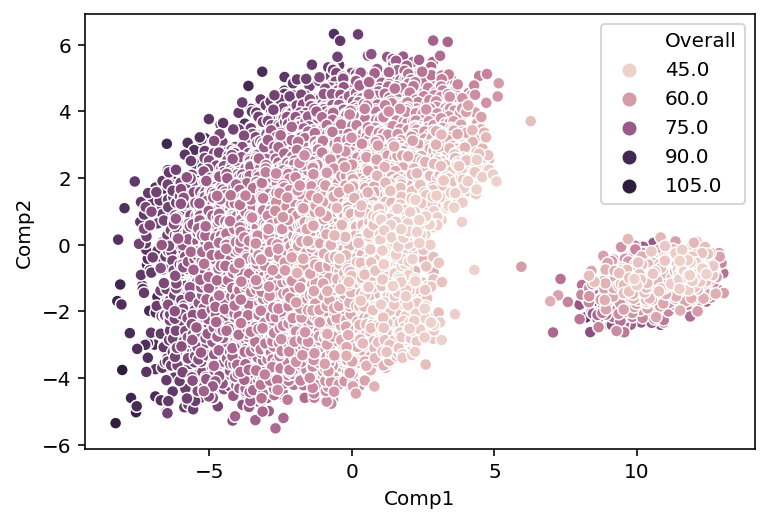

In [106]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Overall', data=score_df)

##  Jersey Number 와 Overall 관계 ##
- Overall 88 이상인 선수 등번호
- 10번 > 1번 > 9번 > 4,5,7,11,14 
- 10번은 공격수의 번호임과 동시에 공격진 ACE를 나타내는 번호이기에, 공격형 미드필더가 다는 경우도 있음
- 등번호 10번의 대표적인 선수는 FC 바르셀로나의 메시. 은퇴한 선수에서는 AS 로마의 레전드 토티나 유벤투스 FC의 델 피에로임
- 1번은 골키퍼
- 9번이 스트라이커의 등번호라는 점에는 모두 인정하지만 10번과 11번은 상황에 따라 다름
- 맨체스터 유나이티드와 레알 마드리드 CF의 7번 계보가 유명함. 맨유의 조지 베스트 - 브라이언 롭슨 - 에릭 칸토나 - 데이비드 베컴 - 크리스티아누 호날두로 이어지는 7번의 상징성 엄청남
- 아프리카 국가들은 ACE에게 4번을 주는 경향이 있음. 그래서 아프리카 대표팀의 4번은 공격수일 가능성이 높음
- 11번의 경우 레프트 윙어의 번호이긴 하지만 보통 팀에서 가장 빠른 사람이 해당 포지션을 맡는다고 하지만, 간혹 11번을 단 공격수도 종종 존재함
- 14번의 경우 선수와 감독으로써 축구계에 큰 족적을 남긴 요한 크루이프의 아약스시절 등번호이며 티에리 앙리 또한 커리어 내내 14번을 달았음

In [88]:
# Overall 85 이상인 선수 등번호
best_players = fifa.loc[(fifa['Overall']>85)].sort_values(by='Overall', ascending=False)
best_players

Unnamed: 0      ID               Name  Age  \
0            0  158023           L. Messi   31   
1            1   20801  Cristiano Ronaldo   33   
2            2  190871          Neymar Jr   26   
3            3  193080             De Gea   27   
4            4  192985       K. De Bruyne   27   
..         ...     ...                ...  ...   
59          59  203376        V. van Dijk   26   
58          58  208722            S. Mané   26   
57          57  210257            Ederson   24   
56          56  218667     Bernardo Silva   23   
76          76      41            Iniesta   34   

                                             Photo  Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png    Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png     Portugal   
2   https://cdn.sofifa.org/players/4/19/190871.png       Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png        Spain   
4   https://cdn.sofifa.org/players/4/19/192985.png      Belgium   
..                                             ...          ...   
59  https://cdn.sofifa.org/players/4/19/203376.png  Netherlands   
58  https://cdn.sofifa.org/players/4/19/208722.png      Senegal   
57  https://cdn.sofifa.org/players/4/19/210257.png       Brazil   
56  https://cdn.sofifa.org/players/4/19/218667.png     Portugal   
76      https://cdn.sofifa.org/players/4/19/41.png        Spain   

                                    Flag  Overall  Potential  \
0    https://cdn.sofifa.org/flags/52.png       94         94   
1    https://cdn.sofifa.org/flags/38.png       94         94   
2    https://cdn.sofifa.org/flags/54.png       92         93   
3    https://cdn.sofifa.org/flags/45.png       91         93   
4     https://cdn.sofifa.org/flags/7.png       91         92   
..                                   ...      ...        ...   
59   https://cdn.sofifa.org/flags/34.png       86         88   
58  https://cdn.sofifa.org/flags/136.png       86         87   
57   https://cdn.sofifa.org/flags/54.png       86         90   
56   https://cdn.sofifa.org/flags/38.png       86         91   
76   https://cdn.sofifa.org/flags/45.png       86         86   

                   Club                                        Club Logo  \
0          FC Barcelona     https://cdn.sofifa.org/teams/2/light/241.png   
1              Juventus      https://cdn.sofifa.org/teams/2/light/45.png   
2   Paris Saint-Germain      https://cdn.sofifa.org/teams/2/light/73.png   
3     Manchester United      https://cdn.sofifa.org/teams/2/light/11.png   
4       Manchester City      https://cdn.sofifa.org/teams/2/light/10.png   
..                  ...                                              ...   
59            Liverpool       https://cdn.sofifa.org/teams/2/light/9.png   
58            Liverpool       https://cdn.sofifa.org/teams/2/light/9.png   
57      Manchester City      https://cdn.sofifa.org/teams/2/light/10.png   
56      Manchester City      https://cdn.sofifa.org/teams/2/light/10.png   
76          Vissel Kobe  https://cdn.sofifa.org/teams/2/light/101146.png   

              Value          Wage  Special Preferred Foot  \
0  110500000.000000 565000.000000     2202           Left   
1   77000000.000000 405000.000000     2228          Right   
2  118500000.000000 290000.000000     2143          Right   
3   72000000.000000 260000.000000     1471          Right   
4  102000000.000000 355000.000000     2281          Right   
..              ...           ...      ...            ...   
59  44500000.000000 165000.000000     2046          Right   
58  52000000.000000 195000.000000     2110          Right   
57  41500000.000000 125000.000000     1463           Left   
56  59500000.000000 180000.000000     2039           Left   
76  21500000.000000  21000.000000     2058          Right   

    International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                   5.000000   4.000000     4.000000  Medium/ Medium   
1                   5.000000   4.000000

In [89]:
best_players['Jersey Number']

0    10.000000
1     7.000000
2    10.000000
3     1.000000
4     7.000000
        ...   
59    4.000000
58   10.000000
57   31.000000
56   11.000000
76    8.000000
Name: Jersey Number, Length: 77, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

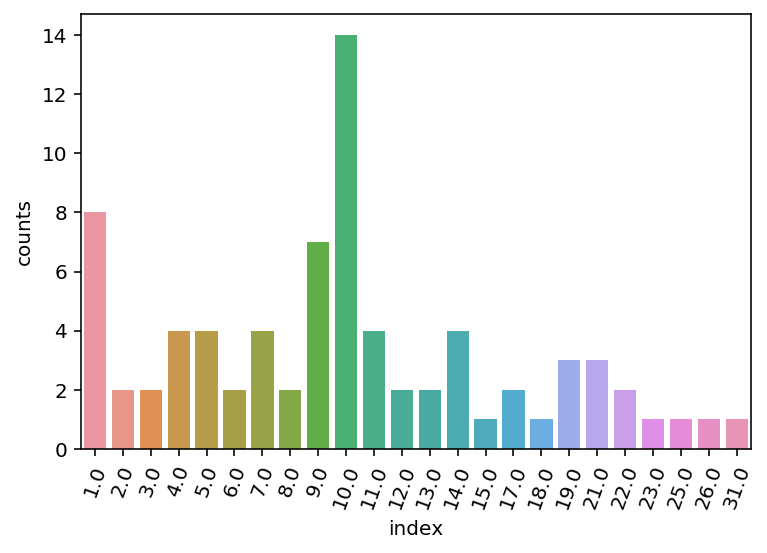

In [109]:
Jersey = best_players['Jersey Number'].value_counts().reset_index(name='counts')
sn.barplot(x="index", y="counts", data=Jersey)
plt.xticks(rotation=70)